<a href="https://colab.research.google.com/github/ASEBRIYfatima/Virus7/blob/main/Classification_de_Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://figshare.com/ndownloader/articles/1512427/versions/5

--2022-01-12 22:44:15--  https://figshare.com/ndownloader/articles/1512427/versions/5
Resolving figshare.com (figshare.com)... 54.76.172.109, 52.210.36.187, 2a05:d018:1f4:d000:68dc:d6b2:d127:41c0, ...
Connecting to figshare.com (figshare.com)|54.76.172.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  27.5MB/s    in 33s     

2022-01-12 22:44:49 (25.6 MB/s) - ‘5’ saved [879501695/879501695]



In [6]:
#!mkdir /content/drive/MyDrive/colab/Dataset
!mv 5 /content/drive/MyDrive/colab/Dataset  

In [7]:
!cd /content/drive/MyDrive/colab/Dataset
!unzip /content/drive/MyDrive/colab/Dataset/5
!unzip brainTumorDataPublic_1-766.zip
!unzip brainTumorDataPublic_1533-2298.zip
!unzip brainTumorDataPublic_2299-3064.zip
!unzip brainTumorDataPublic_767-1532.zip
!pip install mat73




Archive:  /content/drive/MyDrive/colab/Dataset/5
 extracting: brainTumorDataPublic_1-766.zip  
 extracting: brainTumorDataPublic_1533-2298.zip  
 extracting: brainTumorDataPublic_767-1532.zip  
 extracting: brainTumorDataPublic_2299-3064.zip  
 extracting: cvind.mat               
 extracting: README.txt              
Archive:  brainTumorDataPublic_1-766.zip
  inflating: 1.mat                   
  inflating: 10.mat                  
  inflating: 100.mat                 
  inflating: 101.mat                 
  inflating: 102.mat                 
  inflating: 103.mat                 
  inflating: 104.mat                 
  inflating: 105.mat                 
  inflating: 106.mat                 
  inflating: 107.mat                 
  inflating: 108.mat                 
  inflating: 109.mat                 
  inflating: 11.mat                  
  inflating: 110.mat                 
  inflating: 111.mat                 
  inflating: 112.mat                 
  inflating: 113.mat           

In [ ]:
#récupérer les images et les etiqitte 

In [8]:
# Importing librar

import mat73
import cv2
import numpy as np
from PIL import ImageDraw
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np



In [9]:
X=np.zeros((3064,256,256))
Y=np.zeros((3064,))


In [16]:
#redimensionner l'image vers(256,256)
for i in range(0,3064):
  data=mat73.loadmat("/content/"+str(i+1)+".mat")
  resized=cv2.resize(data['cjdata']['image'],(256,256),interpolation=cv2.INTER_AREA)
  Y[i]=data['cjdata']['label']
  X[i]=resized

In [17]:
#decomposition
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0,shuffle=True)

In [18]:
print(X_train.shape)

print(np.shape(X_train),np.shape(Y_train))

print(np.shape(X_test),np.shape(Y_test))


(2451, 256, 256)
(2451, 256, 256) (2451,)
(613, 256, 256) (613,)


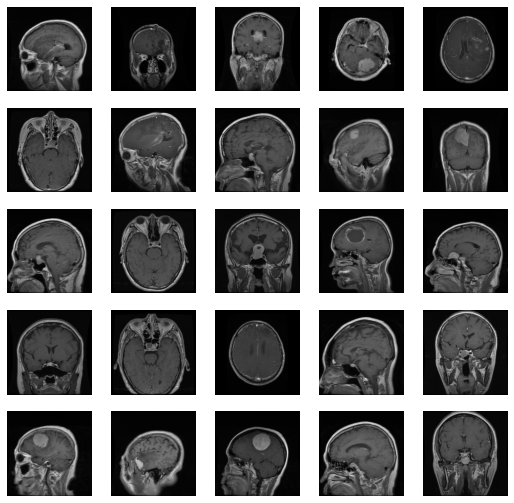

In [19]:
indices=np.random.randint(0,len(X_train),size=25)
images=X_train[indices]
labels=Y_train[indices]
plt.figure(figsize=(9,9))
for i in range(len(indices)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [20]:
labels

array([2., 2., 1., 1., 2., 3., 2., 3., 1., 1., 3., 3., 3., 2., 1., 3., 3.,
       2., 3., 3., 1., 1., 1., 3., 3.])

In [53]:
X_train_v=np.reshape(X_train,[-1,256,256])
X_test_v=np.reshape(X_test,[-1,256,256])

print(np.shape(X_train_v),np.shape(Y_train))
print(np.shape(X_test_v),np.shape(Y_test))

(2451, 256, 256) (2451,)
(613, 256, 256) (613,)


In [40]:
from tensorflow.keras.utils import to_categorical
Y_train_c=to_categorical(Y_train)
Y_test_c=to_categorical(Y_test)

print(np.shape(Y_train),np.shape(Y_train_c))
print(np.shape(Y_test),np.shape(Y_test_c))

(2451,) (2451, 4)
(613,) (613, 4)


In [41]:
print("avant:", Y_train[0])
print("apres:", Y_train_c[0])

avant: 1.0
apres: [0. 1. 0. 0.]


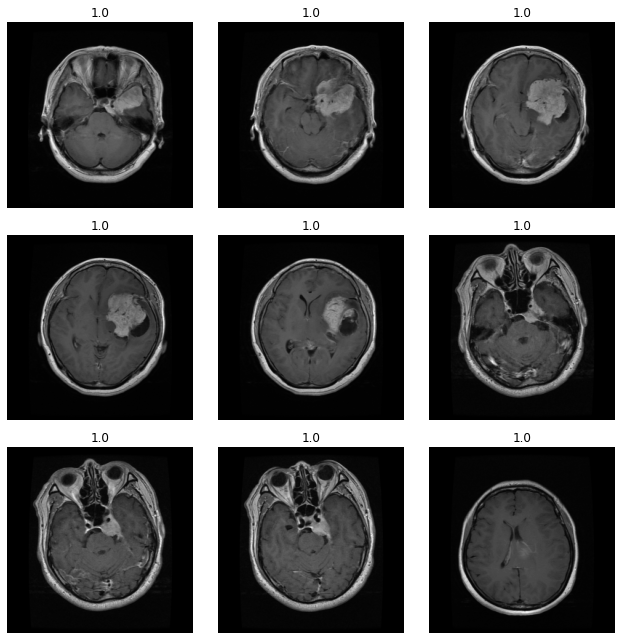

In [42]:
plt.rcParams["figure.figsize"]=[9.,9.]
plt.rcParams["figure.autolayout"]=True

fig,axs=plt.subplots(nrows=3,ncols=3)
axs=axs.flatten()
for ax,j in zip(axs,range(9)):
  ax.axis("off")

  ax.imshow(X[j],cmap='gray')
  ax.set_title(str(Y[j]))

plt.show()

In [48]:
# define input image
input_shape = (256,256,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'lyaer_8')(x)
x = Dropout(0.5) (x)
x = Dense(3, activation='softmax', name='predictions')(x)

In [49]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='Brain_Tumor')

In [50]:
# Print network structure
model.summary()

Model: "Brain_Tumor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 256, 256, 4)]     0         
                                                                 
 layer_1 (Conv2D)            (None, 256, 256, 32)      1184      
                                                                 
 layer_2 (Conv2D)            (None, 256, 256, 64)      18496     
                                                                 
 layer_3 (MaxPooling2D)      (None, 128, 128, 64)      0         
                                                                 
 dropout_16 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 layer_4 (Conv2D)            (None, 128, 128, 64)      36928     
                                                                 
 layer_5 (MaxPooling2D)      (None, 64, 64, 64)        

In [51]:
# Compiling the model
fc="binary_crossentropy"
model.compile(optimizer='adam', loss=fc, metrics=['accuracy'])

In [52]:
# start Train/Test

hist=model.fit(X_train_v,Y_train_c,validation_data=(X_test_v,Y_test_c),
               batch_size=60,epochs=50, shuffle=True)


Epoch 1/50


ValueError: ignored

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_Brain_Tumor :  Loss  &  Validation Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_Brain_Tumor :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['Brain_Tumor+', 'Brain_Tumor-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()